In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# import data

In [2]:
df_all = pd.read_csv('data/data_pm25_plus_darksky.csv',index_col = 0, header = 0)
df_all.head()

,date,pm25_nie,pm25_kon,pm25_wok,apparentTemperature,cloudCover,dewPoint,humidity,icon,ozone,...,windBearing,windGust,windSpeed,year,month,day,hour,day_of_week,no_of_week,winter_break
0,2015-01-01 00:00:00,51.5034,78.085,51.320000,32.93,1.0,29.56,0.87,NaN,NaN,...,260.0,6.93,6.93,2015,1,1,0,4,1,0
1,2015-01-01 01:00:00,71.8204,78.085,68.982316,33.90,1.0,31.11,0.89,NaN,NaN,...,260.0,6.93,6.93,2015,1,1,1,4,1,0
2,2015-01-01 02:00:00,42.6996,64.460,48.707108,27.73,1.0,31.59,0.91,cloudy,NaN,...,260.0,6.93,6.93,2015,1,1,2,4,1,0
3,2015-01-01 03:00:00,38.2824,36.210,37.986883,27.73,1.0,32.76,0.96,fog,NaN,...,251.0,6.93,6.93,2015,1,1,3,4,1,0
4,2015-01-01 04:00:00,35.4194,29.585,33.675489,26.41,1.0,32.89,0.97,fog,NaN,...,251.0,8.96,8.96,2015,1,1,4,4,1,0


In [3]:
df_all.columns

Index(['date', 'pm25_nie', 'pm25_kon', 'pm25_wok', 'apparentTemperature',
       'cloudCover', 'dewPoint', 'humidity', 'icon', 'ozone',
       'precipAccumulation', 'precipIntensity', 'precipProbability',
       'precipType', 'pressure', 'summary', 'temperature', 'time', 'uvIndex',
       'visibility', 'windBearing', 'windGust', 'windSpeed', 'year', 'month',
       'day', 'hour', 'day_of_week', 'no_of_week', 'winter_break'],
      dtype='object')

# PM2.5 distribution

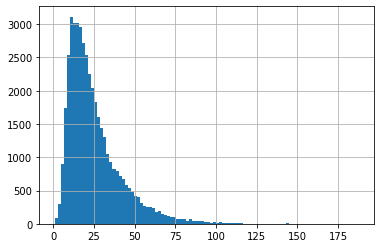

In [7]:
df_all['pm25_nie'].hist(bins=100);

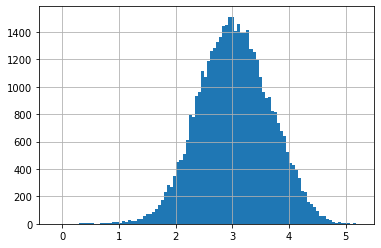

In [5]:
np.log(df_all['pm25_nie']).hist(bins = 100);

# models

In [10]:
import xgboost as xgb

In [11]:
feats = ['apparentTemperature',
        'cloudCover', 'dewPoint', 'humidity', 
        'precipAccumulation', 'precipIntensity', 'precipProbability',
        'pressure', 'temperature',  'uvIndex',
        'visibility', 'windBearing', 'windGust', 'windSpeed',
        'year', 'month', 'day','hour', 
        'day_of_week', 'no_of_week'
        ]

In [12]:
pollution = 'pm25_nie'

y = np.log(df_all[pollution])
X = df_all[feats].values

In [14]:
#XGBoost Regression
model_xgb = xgb.XGBRegressor(objective = 'reg:squarederror', random_state = 2020)

In [15]:
model_xgb.fit(X, y)

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=2020, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
             validate_parameters=False, verbosity=None)

## saving model

In [16]:
import pickle

In [18]:
with open('model/pm25_model_xgb.pkl', 'wb') as file:
  pickle.dump(model_xgb, file)